Regularization
Before we start the concept of regularization we need to understand the concept of Under Fit, Correct Fit and Over fit

-> Underfitting: A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data.
-> Overfitting: A statistical model is said to be overfitted, when we train it with a lot of data
-> Good Fit/Correct Fit: The case when the model makes the predictions with 0 error, is said to have a good fit on the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

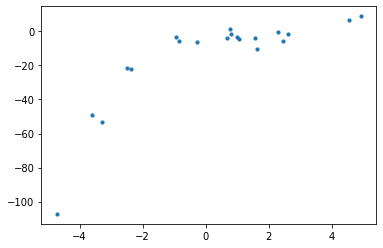

In [2]:
np.random.seed(0)
x=2-3*np.random.normal(0,1,20)
y=x-2*(x**2)+0.5*(x**3)+np.random.normal(-3,3,20)
# The data generated looks like
plt.scatter(x,y, s=10)
plt.show()

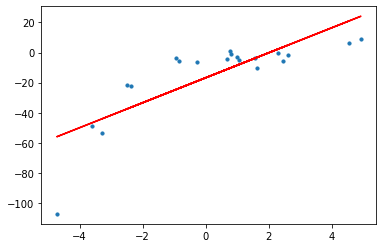

In [3]:
# transforming the data to include another axis
x=x[:,np.newaxis]
y=y[:,np.newaxis]
#lets apply a linear regression model to this dataset 
model=LinearRegression()
model.fit(x,y)
y_lr=model.predict(x)

plt.scatter(x,y, s=10)
plt.plot(x,y_lr,color='r')
plt.show()

In [4]:
#we can see that the straight line is unable to capture the pattern in the data 
#this is example of under fitting.compute the mse and r2
print('mse:',mean_squared_error(y,y_lr))
print('r2:',r2_score(y,y_lr))

mse: 253.07217948430375
r2: 0.6386750054827146


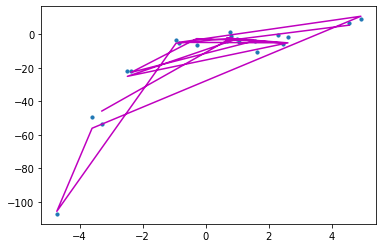

In [5]:
#to convert the original feature into thiear higher term we will use polynomialfeature
#class provided by scikit learn next we train the model using linear regression 
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly3_pred = model.predict(x_poly)
plt.scatter(x,y,s=10)
plt.plot(x,y_poly3_pred,color='m')
plt.show()

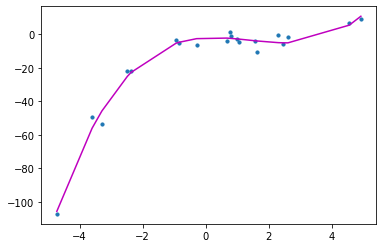

In [6]:
#To the polynomial line proper we need to sort the data
import operator
plt.scatter(x,y,s=10)
# sort the values of x before line plot
sort_axis=operator.itemgetter(0)
sorted_zip=sorted(zip(x,y_poly3_pred),key=sort_axis)
x,y_poly3_pred=zip(*sorted_zip)
plt.plot(x,y_poly3_pred,color='m')
plt.show()

In [7]:
#it is quite clear fro plot that the quadratic curve is able to fit better than linear line
# Computing the RMSE and R²-score of the quadratic plot gives:
print('mse:',mean_squared_error(y,y_poly3_pred))
print('r2:',r2_score(y,y_poly3_pred))

mse: 801.7621935070508
r2: -0.14471974265772536


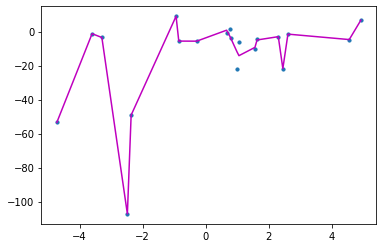

In [8]:
polynomial_features20= PolynomialFeatures(degree=20)
x_poly20 = polynomial_features20.fit_transform(x)
model = LinearRegression()
model.fit(x_poly20, y)
y_poly20_pred = model.predict(x_poly20)
plt.scatter(x,y,s=10)
plt.plot(x,y_poly20_pred,color='m')
plt.show()

In [9]:
print('mse:',mean_squared_error(y,y_poly20_pred))
print('r2:',r2_score(y,y_poly20_pred))

mse: 9.24670923683922
r2: 0.9867979673976329


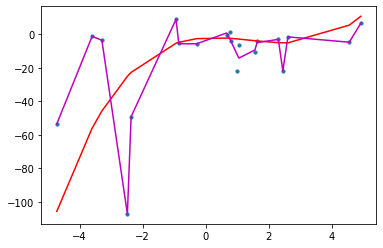

In [10]:
plt.scatter(x,y,s=10)
plt.plot(x,y_poly3_pred,color='r')

plt.plot(x,y_poly20_pred,color='m')
plt.show()

In [11]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [12]:
l2 = Ridge(0.05)
l2.fit(X_train,y_train)
l2.coef_

NameError: name 'X_train' is not defined

In [13]:
l1 = Lasso(1000)
l1.fit(X_train,y_train)
l1.coef_
predictors = X_train.columns
coef = pd.Series(l1.coef_, predictors).sort_values()
print(coef)
coef.plot(kind="bar", title="Model Coefficients")
plt.show()

NameError: name 'X_train' is not defined

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
l1_cross = cross_val_score(l1,X,y,cv=4)

NameError: name 'X' is not defined

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Loading the data into the dataframe from csv
df = pd.read_csv("cars.csv")

In [18]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [19]:
# here we replace the ? with nan values
df["normalized-losses"].replace("?",np.nan,inplace=True)
# converting the column into float
df["normalized-losses"] = df["normalized-losses"].astype(float)
# generating mean of the column for replacing nan values
losses_mean = df["normalized-losses"].mean()
# replacing nan values with mean values
df["normalized-losses"].fillna(losses_mean,inplace=True)

In [20]:
# here we replace the ? with nan values
df["horsepower"].replace("?",np.nan,inplace=True)
# converting the column into float
df["horsepower"] = df["horsepower"].astype(float)
# generating mean of the column for replacing nan values
horsepower_mean = df["horsepower"].mean()
# replacing nan values with mean values
df["horsepower"].fillna(horsepower_mean,inplace=True)


In [21]:
df_num = df.select_dtypes(["int64","float64"])
df_cat = df.select_dtypes("object")

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
# Looping each column name for encoding purpose
for col in df_cat:
    le = LabelEncoder()
    # fit_transform function converts all the words into numbers
    df_cat[col] = le.fit_transform(df_cat[col])

C:\Users\jayes\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
# concating both the dataframes with columns into a new dataframe 
df_new = pd.concat([df_num,df_cat],axis=1)

In [25]:
# importing the splitting function and LinearRegression class
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
X = df_new.drop("price",axis=1)
y = df["price"]

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=1)


In [28]:
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lin.score(X_train,y_train)

0.8504573774895473

In [30]:
lin.coef_

array([ 4.51384957e+01,  1.53127607e+00,  7.89452171e+02,  3.62663990e+02,
        9.83682875e+01, -1.08169245e+01,  3.08017854e+02, -4.17024371e+02,
       -2.00099087e+02, -6.22650015e+02, -1.70235175e+02,  1.86860719e+03,
        1.64133620e+04,  2.83174279e+02])

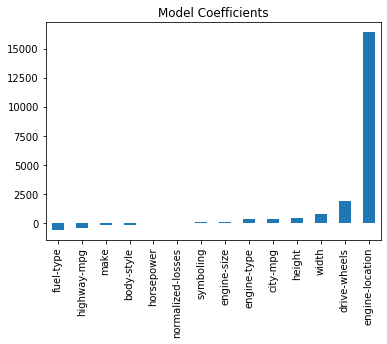

In [31]:
#check the coefficients of the Linear model
predictors = X_train.columns
coef = pd.Series(lin.coef_, predictors).sort_values()
coef.plot(kind="bar", title="Model Coefficients")
plt.show()

In [32]:
# Implementing libraries for Lasso and Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [33]:
# Ridge Regression with lambda/alpha value = 0.05
l2 = Ridge(0.05)
l2.fit(X_train,y_train)
l2.coef_

array([ 5.17842485e+01,  1.38737171e+00,  7.74129972e+02,  3.69974903e+02,
        9.84237528e+01, -9.69330324e+00,  3.04459127e+02, -4.12319470e+02,
       -1.99877484e+02, -6.59187948e+02, -1.86641567e+02,  1.87224727e+03,
        1.59621071e+04,  2.93316739e+02])

In [34]:
l2.fit(X_train, y_train)


Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

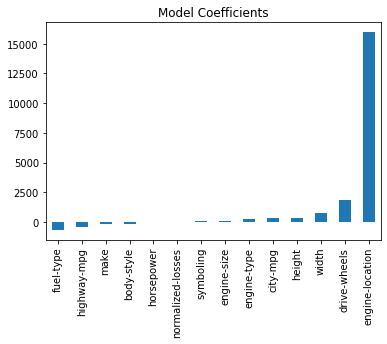

In [35]:
#check the coefficients of the Linear model
predictors = X_train.columns
coef = pd.Series(l2.coef_, predictors).sort_values()
coef.plot(kind="bar", title="Model Coefficients")
plt.show()

[ 2.08658930e+02 -5.60173023e-01  3.64420144e+02  5.72916414e+02
  1.04441215e+02  2.21332730e+01  2.11271281e+02 -2.72864381e+02
 -1.86340249e+02 -9.06610516e+02 -6.30655861e+02  1.56860422e+03
  2.57047785e+03  5.15948757e+02]


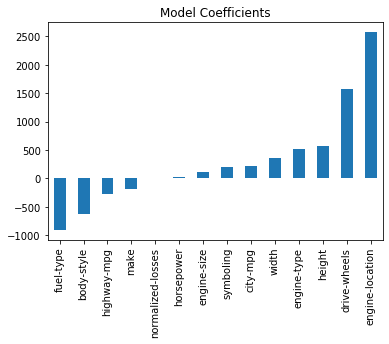

In [36]:
# Ridge Regression with lambda/alpha value = 10
l2 = Ridge(10)
l2.fit(X_train,y_train)
print(l2.coef_)
predictors = X_train.columns
coef = pd.Series(l2.coef_, predictors).sort_values()
# plt.figure(figsize=(10,8))
coef.plot(kind="bar", title="Model Coefficients")
plt.show()

make                -126.406952
highway-mpg         -113.033120
symboling              0.000000
width                  0.000000
city-mpg              -0.000000
fuel-type             -0.000000
body-style            -0.000000
drive-wheels           0.000000
engine-location        0.000000
engine-type            0.000000
normalized-losses      3.963107
horsepower            16.001291
engine-size          135.341692
height               276.932792
dtype: float64


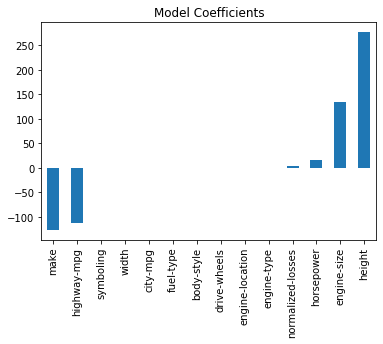

In [37]:
# Lasso helps in feature selection
l1 = Lasso(1000)
l1.fit(X_train,y_train)
l1.coef_
predictors = X_train.columns
coef = pd.Series(l1.coef_, predictors).sort_values()
print(coef)
coef.plot(kind="bar", title="Model Coefficients")
plt.show()

In [38]:
for i in range(50):
    l2 = Ridge(alpha=i)
    l2.fit(X_train,y_train)
    print(i,":",l2.score(X_test,y_test))


0 : 0.7965566780397382
1 : 0.8074518758147277
2 : 0.8110292248150512
3 : 0.8126933383890032
4 : 0.8136148645029302
5 : 0.8141745853539419
6 : 0.8145301242133359
7 : 0.8147582608502814
8 : 0.8149010602831952
9 : 0.814983694925305
10 : 0.8150222867376524
11 : 0.8150277245431793
12 : 0.8150076788279419
13 : 0.8149677381788262
14 : 0.8149120868051175
15 : 0.8148439278252517
16 : 0.814765758494739
17 : 0.8146795554128128
18 : 0.8145869029046833
19 : 0.8144890843369584
20 : 0.8143871485445551
21 : 0.8142819591129825
22 : 0.8141742315788492
23 : 0.8140645619421536
24 : 0.8139534488166059
25 : 0.8138413108452037
26 : 0.8137285005403768
27 : 0.8136153153884843
28 : 0.8135020068362637
29 : 0.8133887876197213
30 : 0.8132758377831448
31 : 0.813163309653795
32 : 0.8130513319772293
33 : 0.8129400133729978
34 : 0.8128294452363019
35 : 0.8127197041851854
36 : 0.8126108541327796
37 : 0.812502948048576
38 : 0.8123960294605083
39 : 0.8122901337400303
40 : 0.8121852892047277
41 : 0.8120815180669056
42 : 0

In [39]:
for i in range(100,500,50):
    l1 = Lasso(alpha=i)
    l1.fit(X_train,y_train)
    print(i,":",l1.score(X_test,y_test))

100 : 0.8089989416007807
150 : 0.8124970042062466
200 : 0.813920135802378
250 : 0.812421909078023
300 : 0.8085057299003378
350 : 0.8036053753129062
400 : 0.7977229768452245
450 : 0.7950465607641612


In [40]:
l2 = Ridge(alpha=10)
l2.fit(X_train,y_train)
print(l2.score(X_test,y_test))

0.8150222867376524
